# Code in this jupyter notebook reproduces results from the Ragas QuickStart vignette

In [1]:
library(Ragas)

Loading required package: Seurat

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




# 1. Introduction

## 1.1 The post-integration (Pi) object

In [2]:
csle.pbmc.small

An object of class Seurat 
1503 features across 3000 samples within 1 assay 
Active assay: RNA (1503 features, 1501 variable features)
 3 layers present: counts, data, scale.data
 3 dimensional reductions calculated: pca, harmony, umap

In [3]:
csle.pbmc.pi

An object of class Pi 
6 fields in the object: seurat.obj, exp.freq, markers, ds, cell.prop, parent.meta.data.
The following fields have been processed:
	seurat.obj: A Seurat object of 1503 features and 2901 cells.
		1 assay: RNA, and 4 reductions: pca, harmony, umap, rp
	exp.freq: A list of numeric matrices containing per gene expression frequencies
		1 analysis run: 
		  ExpFreq|subcluster_idents|cutoff=0
	markers: A list of data frames containing marker results.
		1 analysis run: 
		  Markers|subcluster_idents|AllMarkers|test.use=wilcox
	ds: A list of lists and data frames containing pseudobulk analysis results.
		1 analysis run: 
		  DS|subcluster_idents|edgeR|group=Groups;sample=Names;gp1=cSLE;gp2=cHD;contrast=cSLE-cHD
	cell.prop: A list of data frames containing cell proportion analysis results
		1 analysis run: 
		  CellProp|subcluster_idents|unpooled|unpool_by_Names|group=Groups
Metadata from the parent object provided? No 
Subclusters integrated? Yes

## 1.2 Create a Pi object

In [4]:
my.pbmc.pi <- CreatePostIntegrationObject(object = csle.pbmc.small)
my.pbmc.pi


Post-integration object created



An object of class Pi 
6 fields in the object: seurat.obj, exp.freq, markers, ds, cell.prop, parent.meta.data.
The following field has been processed:
	seurat.obj: A Seurat object of 1503 features and 3000 cells.
		1 assay: RNA, and 3 reductions: pca, harmony, umap
Metadata from the parent object provided? No 
Subclusters integrated? No

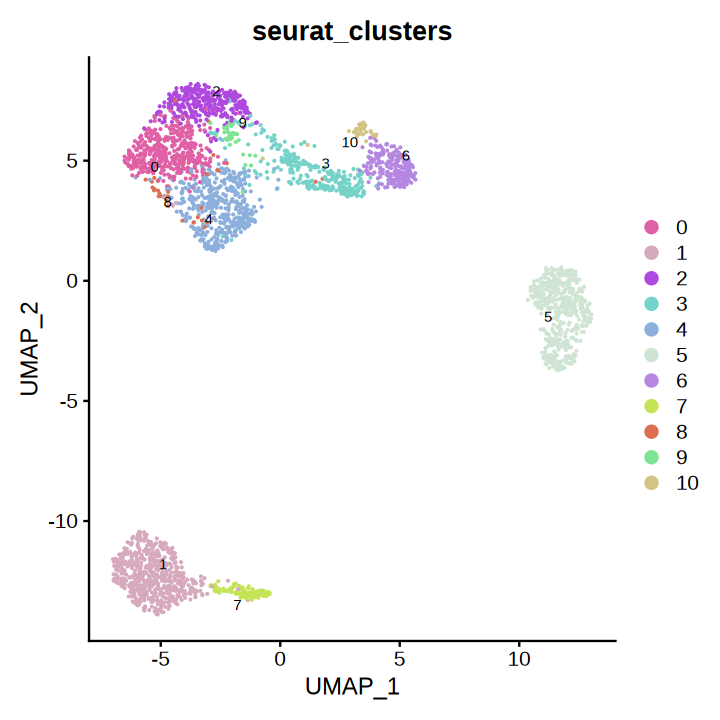

In [5]:
options(repr.plot.width = 6, repr.plot.height = 6)
RunDimPlot(object = my.pbmc.pi)

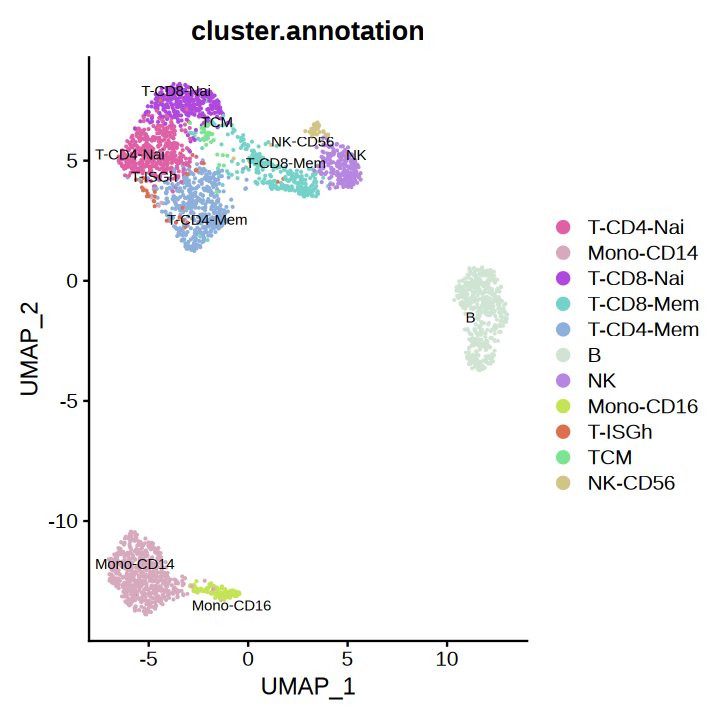

In [6]:
options(repr.plot.width = 6, repr.plot.height = 6)
RunDimPlot(object = my.pbmc.pi,
           group.by = "cluster.annotation")

# 2 Analysis

## 2.1 Marker analysis and matrix plot

### 2.1.1 Wrapper for FindAllMarkers on a Pi object

In [7]:
my.pbmc.pi <- RunFindAllMarkers(my.pbmc.pi,
                                ident = "cluster.annotation")

Calculating cluster T-CD4-Nai

For a (much!) faster implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the presto package
--------------------------------------------
install.packages('devtools')
devtools::install_github('immunogenomics/presto')
--------------------------------------------
After installation of presto, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session

Calculating cluster Mono-CD14

Calculating cluster T-CD8-Nai

Calculating cluster T-CD8-Mem

Calculating cluster T-CD4-Mem

Calculating cluster B

Calculating cluster NK

Calculating cluster Mono-CD16

Calculating cluster T-ISGh

Calculating cluster TCM

Calculating cluster NK-CD56



In [8]:
my.pbmc.pi

An object of class Pi 
6 fields in the object: seurat.obj, exp.freq, markers, ds, cell.prop, parent.meta.data.
The following fields have been processed:
	seurat.obj: A Seurat object of 1503 features and 3000 cells.
		1 assay: RNA, and 3 reductions: pca, harmony, umap
	markers: A list of data frames containing marker results.
		1 analysis run: 
		  Markers|cluster.annotation|AllMarkers|test.use=wilcox
Metadata from the parent object provided? No 
Subclusters integrated? No

In [9]:
my.pbmc.pi[["markers"]]

1 markers object(s):
 + analysis 1 
  A PiMarkerData object
  5822 markers for 11 clusters
  type: markers 
  identity: cluster.annotation 
  method: AllMarkers 
  param: test.use=wilcox 

### 2.1.2 Matrix plot

Centering and scaling data matrix



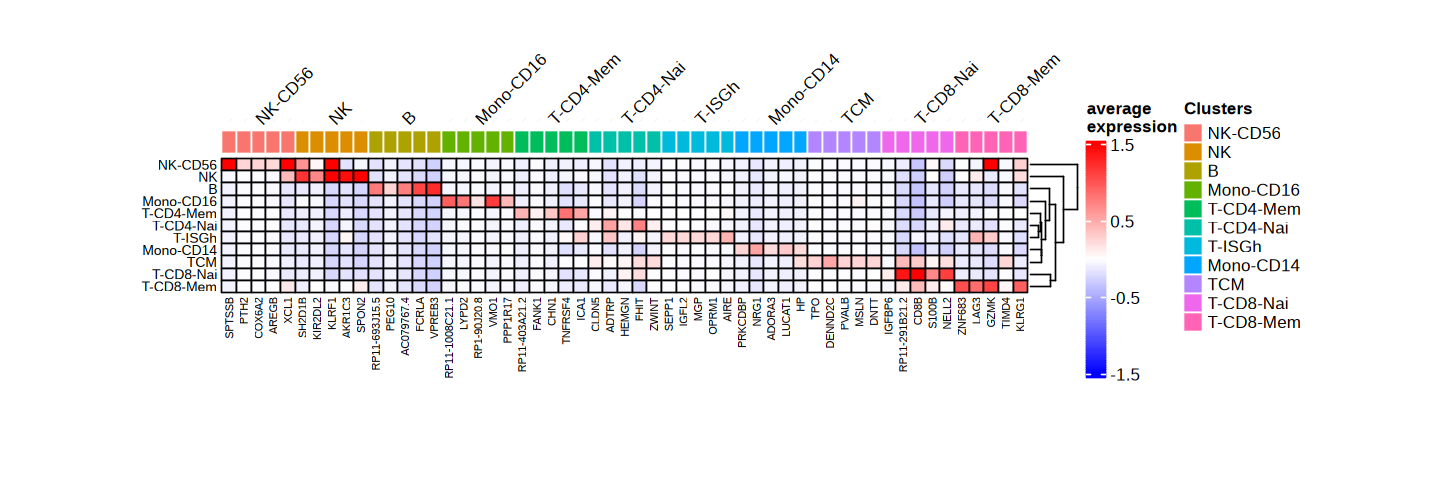

In [10]:
options(repr.plot.width = 12, repr.plot.height = 4)
RunMatrixPlot(my.pbmc.pi,
              markers.key = "Markers|cluster.annotation|AllMarkers|test.use=wilcox", 
              column.anno.name.rot = 45, 
              heatmap.height = 6)

## 2.2 Pseudobulk analysis

### 2.2.1 Calculate expression frequencies

In [11]:
my.pbmc.pi <- CalculateExpFreqs(my.pbmc.pi, 
                                ident = "cluster.annotation",
                                verbose = FALSE)
my.pbmc.pi

An object of class Pi 
6 fields in the object: seurat.obj, exp.freq, markers, ds, cell.prop, parent.meta.data.
The following fields have been processed:
	seurat.obj: A Seurat object of 1503 features and 3000 cells.
		1 assay: RNA, and 3 reductions: pca, harmony, umap
	exp.freq: A list of numeric matrices containing per gene expression frequencies
		1 analysis run: 
		  ExpFreq|cluster.annotation|cutoff=0
	markers: A list of data frames containing marker results.
		1 analysis run: 
		  Markers|cluster.annotation|AllMarkers|test.use=wilcox
Metadata from the parent object provided? No 
Subclusters integrated? No

### 2.2.2 Run pseudobulk analysis

In [12]:
my.pbmc.pi <- RunPseudobulkAnalysis(object = my.pbmc.pi,
                                    ident.var = "cluster.annotation",
                                    group.var = "Groups",
                                    sample.var = "Names",
                                    group.1 = "cSLE",
                                    group.2 = "cHD")

Checking validity of names...

Contrast created: group_idcSLE-group_idcHD

Creating single cell experiment object...

Aggregating count data...

Running differential state analysis...



  |======================================================================| 100%




Formatting output...

Pseudobulk-analysis completed!



In [13]:
my.pbmc.pi

An object of class Pi 
6 fields in the object: seurat.obj, exp.freq, markers, ds, cell.prop, parent.meta.data.
The following fields have been processed:
	seurat.obj: A Seurat object of 1503 features and 3000 cells.
		1 assay: RNA, and 3 reductions: pca, harmony, umap
	exp.freq: A list of numeric matrices containing per gene expression frequencies
		1 analysis run: 
		  ExpFreq|cluster.annotation|cutoff=0
	markers: A list of data frames containing marker results.
		1 analysis run: 
		  Markers|cluster.annotation|AllMarkers|test.use=wilcox
	ds: A list of lists and data frames containing pseudobulk analysis results.
		1 analysis run: 
		  DS|cluster.annotation|edgeR|group=Groups;sample=Names;gp1=cSLE;gp2=cHD;contrast=cSLE-cHD
Metadata from the parent object provided? No 
Subclusters integrated? No

### 2.2.3 Visualize pseudobulk results with DSDotPlot

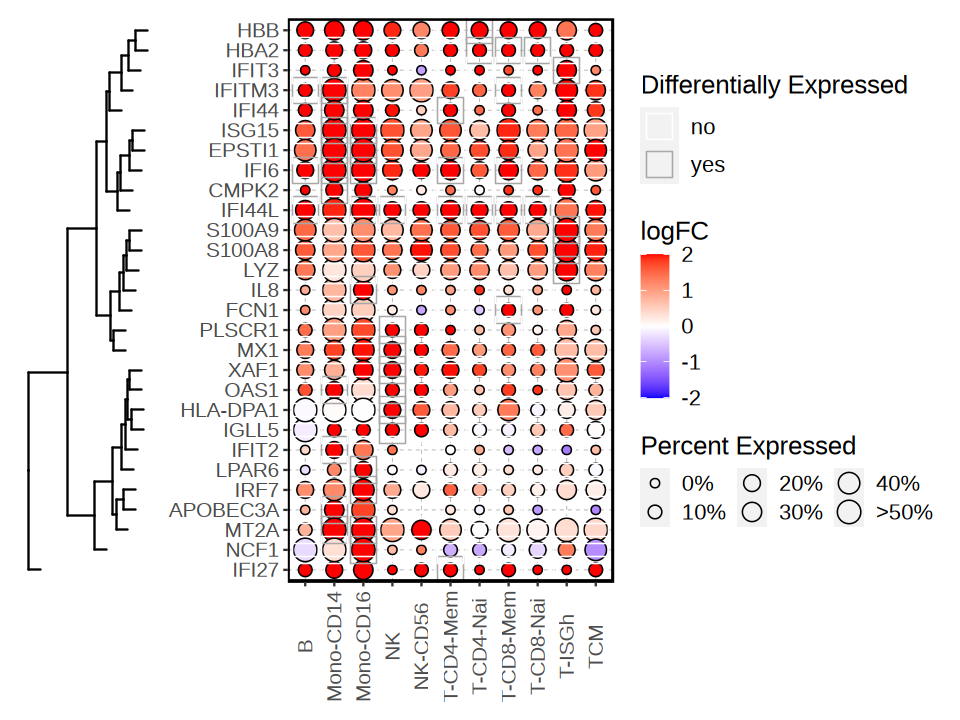

In [14]:
options(repr.plot.width = 8, repr.plot.height = 6)
RunDSDotPlot(object = my.pbmc.pi,
             exp.freq.key = "ExpFreq|cluster.annotation|cutoff=0",
             ds.key = "DS|cluster.annotation|edgeR|group=Groups;sample=Names;gp1=cSLE;gp2=cHD;contrast=cSLE-cHD", 
             p.filter = 0.05,
             FC.filter = 4,
             to.adjust = TRUE)

## 2.3 Proportion analysis

### 2.3.1 Pooled proportion plot

#### 2.3.1.1 by cluster

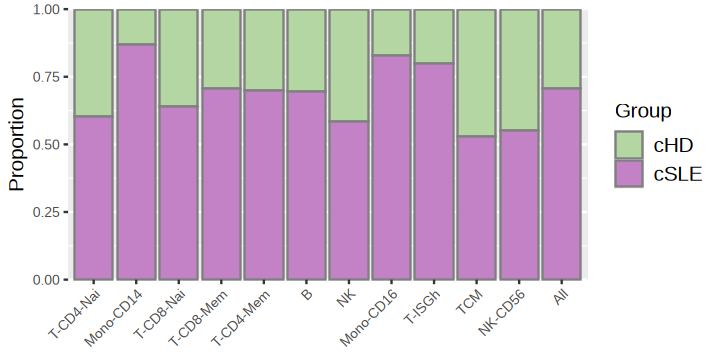

In [15]:
options(repr.plot.width = 6, repr.plot.height = 3)
RunProportionPlot(csle.pbmc.small, ## input can be a Seurat object
                  ident = "cluster.annotation",
                  group.by = "Groups",
                  method = "pooled",
                  pooled.prop.by = "cluster", ## default
                  axis.text.angle = 45,
                  axis.text.size = 8,
                  return.value = 'ggplot'
                  )

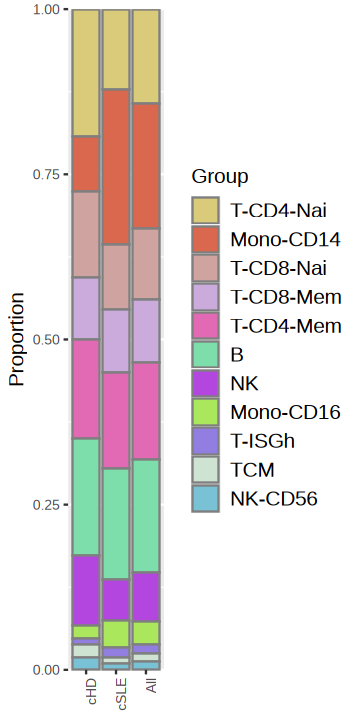

In [16]:
options(repr.plot.width = 3, repr.plot.height = 6)
my.pbmc.pi <- RunProportionPlot(my.pbmc.pi, ## if input is a Pi object, an updated Pi object will be the returned by default
                                ident = "Groups",
                                group.by = "cluster.annotation",
                                method = "pooled",
                                pooled.prop.by = "cluster", ## default
                                axis.text.size = 8)

In [17]:
my.pbmc.pi 

An object of class Pi 
6 fields in the object: seurat.obj, exp.freq, markers, ds, cell.prop, parent.meta.data.
The following fields have been processed:
	seurat.obj: A Seurat object of 1503 features and 3000 cells.
		1 assay: RNA, and 3 reductions: pca, harmony, umap
	exp.freq: A list of numeric matrices containing per gene expression frequencies
		1 analysis run: 
		  ExpFreq|cluster.annotation|cutoff=0
	markers: A list of data frames containing marker results.
		1 analysis run: 
		  Markers|cluster.annotation|AllMarkers|test.use=wilcox
	ds: A list of lists and data frames containing pseudobulk analysis results.
		1 analysis run: 
		  DS|cluster.annotation|edgeR|group=Groups;sample=Names;gp1=cSLE;gp2=cHD;contrast=cSLE-cHD
	cell.prop: A list of data frames containing cell proportion analysis results
		1 analysis run: 
		  CellProp|Groups|pooled|group=cluster.annotation
Metadata from the parent object provided? No 
Subclusters integrated? No

#### 2.3.1.2 by group

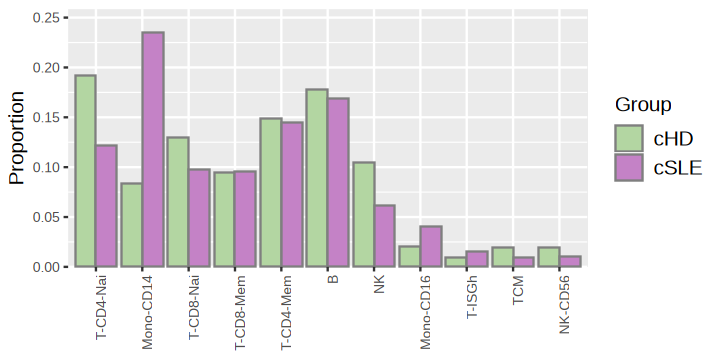

In [18]:
options(repr.plot.width = 6, repr.plot.height = 3)
my.pbmc.pi <- RunProportionPlot(my.pbmc.pi,
                                ident = "cluster.annotation",
                                group.by = "Groups",
                                method = "pooled",
                                pooled.prop.by = "group",
                                axis.text.size = 8)

In [19]:
my.pbmc.pi

An object of class Pi 
6 fields in the object: seurat.obj, exp.freq, markers, ds, cell.prop, parent.meta.data.
The following fields have been processed:
	seurat.obj: A Seurat object of 1503 features and 3000 cells.
		1 assay: RNA, and 3 reductions: pca, harmony, umap
	exp.freq: A list of numeric matrices containing per gene expression frequencies
		1 analysis run: 
		  ExpFreq|cluster.annotation|cutoff=0
	markers: A list of data frames containing marker results.
		1 analysis run: 
		  Markers|cluster.annotation|AllMarkers|test.use=wilcox
	ds: A list of lists and data frames containing pseudobulk analysis results.
		1 analysis run: 
		  DS|cluster.annotation|edgeR|group=Groups;sample=Names;gp1=cSLE;gp2=cHD;contrast=cSLE-cHD
	cell.prop: A list of data frames containing cell proportion analysis results
		2 analysis runs: 
		  CellProp|Groups|pooled|group=cluster.annotation
		  CellProp|cluster.annotation|pooled|group=Groups
Metadata from the parent object provided? No 
Subclusters integra

### 2.3.2 Unpooled proportion plot

#### 2.3.2.1 Unpooled boxplot

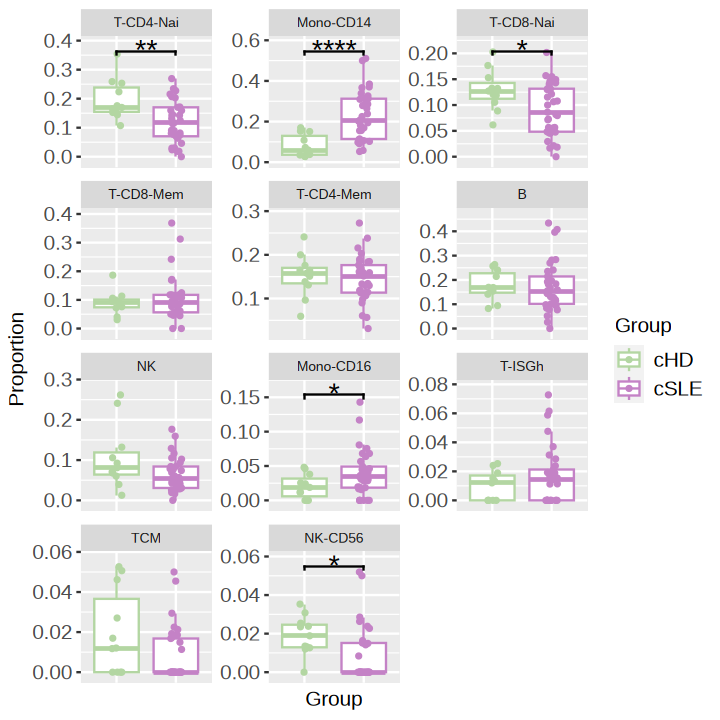

In [20]:
options(repr.plot.width = 6, repr.plot.height = 6)
my.pbmc.pi <- RunProportionPlot(my.pbmc.pi,
                  ident = "cluster.annotation",
                  group.by = "Groups",
                  method = "unpooled",
                  unpool.by = "Names",
                  unpool.ncol = 3,
                  title.text.size = 8)

#### 2.3.2.2 Unpooled barplot

PiData CellProp|cluster.annotation|unpooled|unpool_by_Names|group=Groups already exisits. Overwriting...



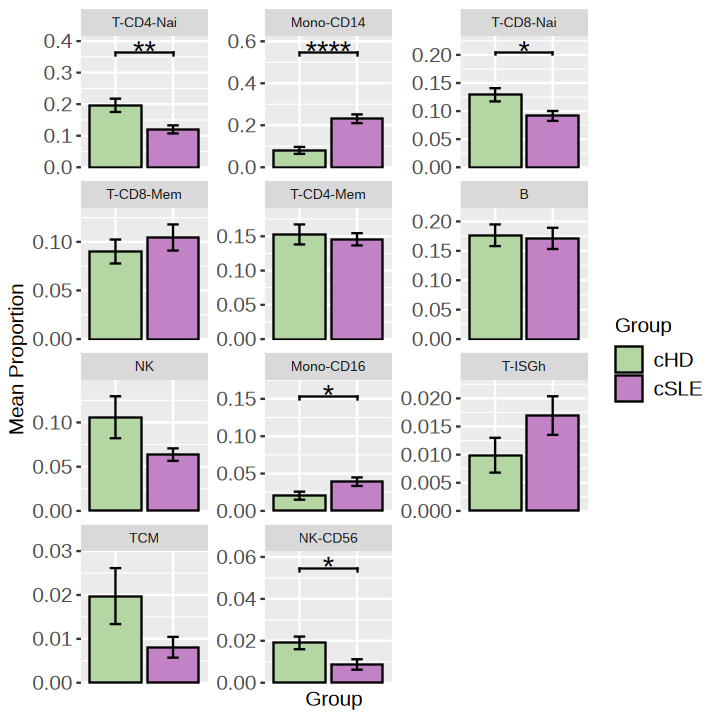

In [21]:
options(repr.plot.width = 6, repr.plot.height = 6)
my.pbmc.pi <- RunProportionPlot(my.pbmc.pi,
                                ident = "cluster.annotation",
                                group.by = "Groups",
                                method = "unpooled",
                                unpool.by = "Names",
                                unpool.plot.type = "barplot",
                                unpool.ncol = 3,
                                title.text.size = 8)

# 3 Miscellaneous visualization

## 3.1 Annotated dot plot

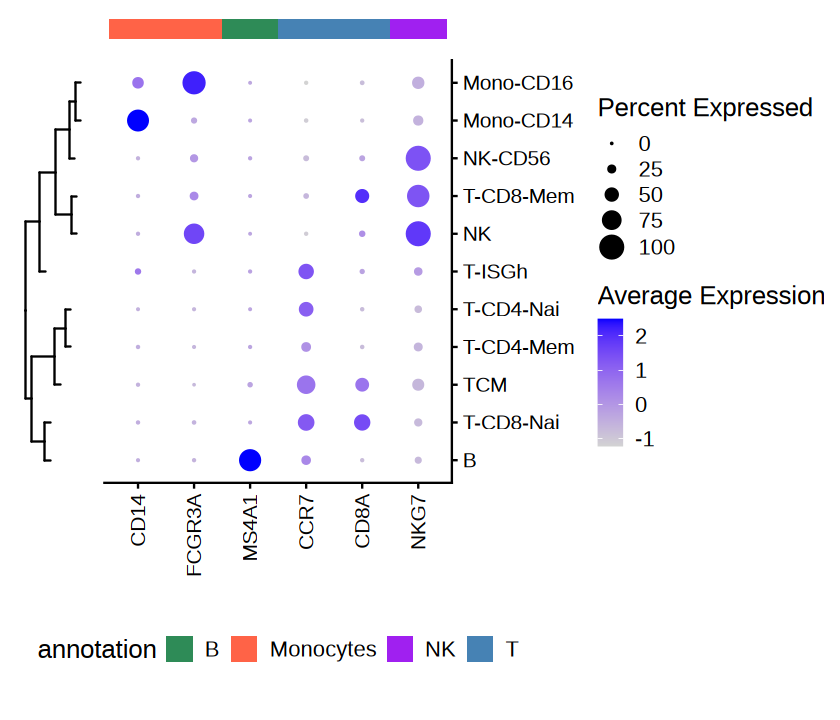

In [22]:
my.list <- list(Monocytes = c("CD14","FCGR3A"),
                B = "MS4A1",
                T = c("CCR7", "CD8A"),
                NK = "NKG7")
options(repr.plot.width = 7, repr.plot.height = 6)
RunAnnotatedDotPlot(object = my.pbmc.pi,
                    annotations = my.list,
                    annotation.cols = c( 'Monocytes'= 'tomato', 'B' = 'seagreen', 'T' = 'steelblue', 'NK' = 'purple'),
                    group.by = "cluster.annotation")

## 3.2 Stacked violin plot

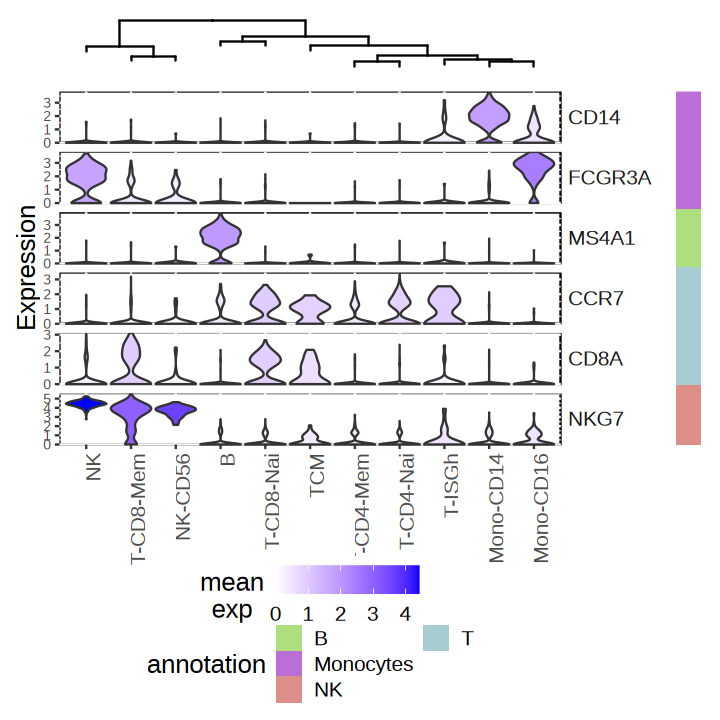

In [23]:
options(repr.plot.width = 6, repr.plot.height = 6)
RunStackedVlnPlot(my.pbmc.pi,
                  ident = "cluster.annotation",
                  features = my.list,
                  color.by = "mean.exp",
                  column.names.rotation = 90)

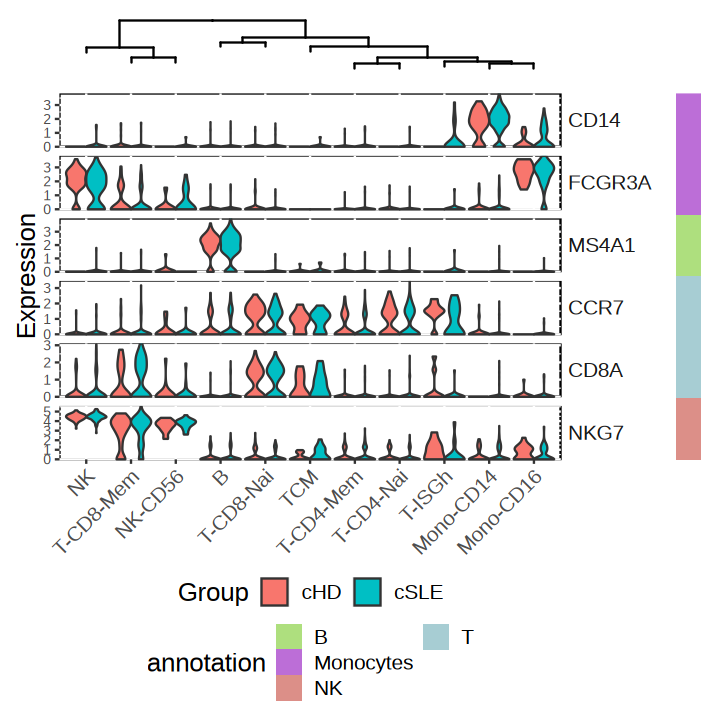

In [24]:
options(repr.plot.width = 6, repr.plot.height = 6)
RunStackedVlnPlot(my.pbmc.pi,
                  ident = "cluster.annotation",
                  features = my.list,
                  split.by = "Groups",
                  color.by = "split.var",
                  column.names.rotation = 45)

## 3.3 Summarized heatmap

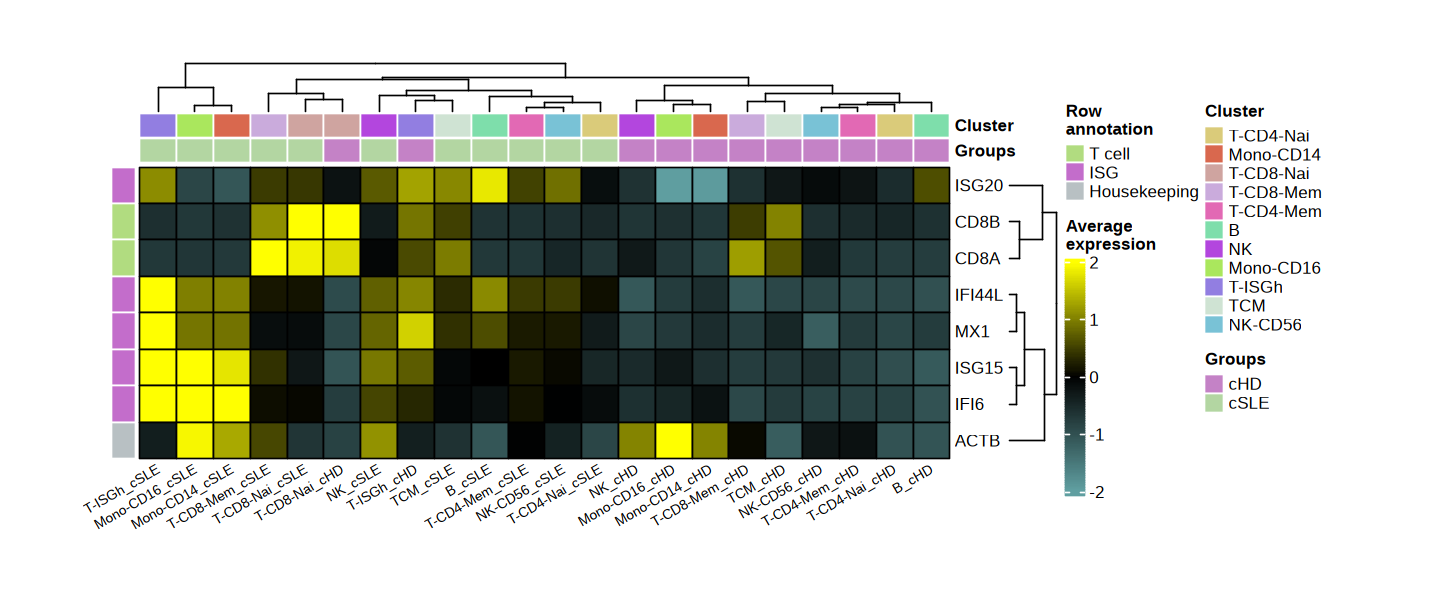

In [25]:
features <- list("T cell" = c("CD8A", "CD8B"),
                ISG = c("ISG15","ISG20","IFI44L", "IFI6", "MX1"),
                "Housekeeping" = c("ACTB"))
options(repr.plot.width = 12, repr.plot.height = 5)
RunSummarizedHeatmap(object = my.pbmc.pi,
                     ident = "cluster.annotation",
                     features = features,
                     split.by = "Groups", 
                     column.names.rotation = 30,
                     heatmap.width = 20)

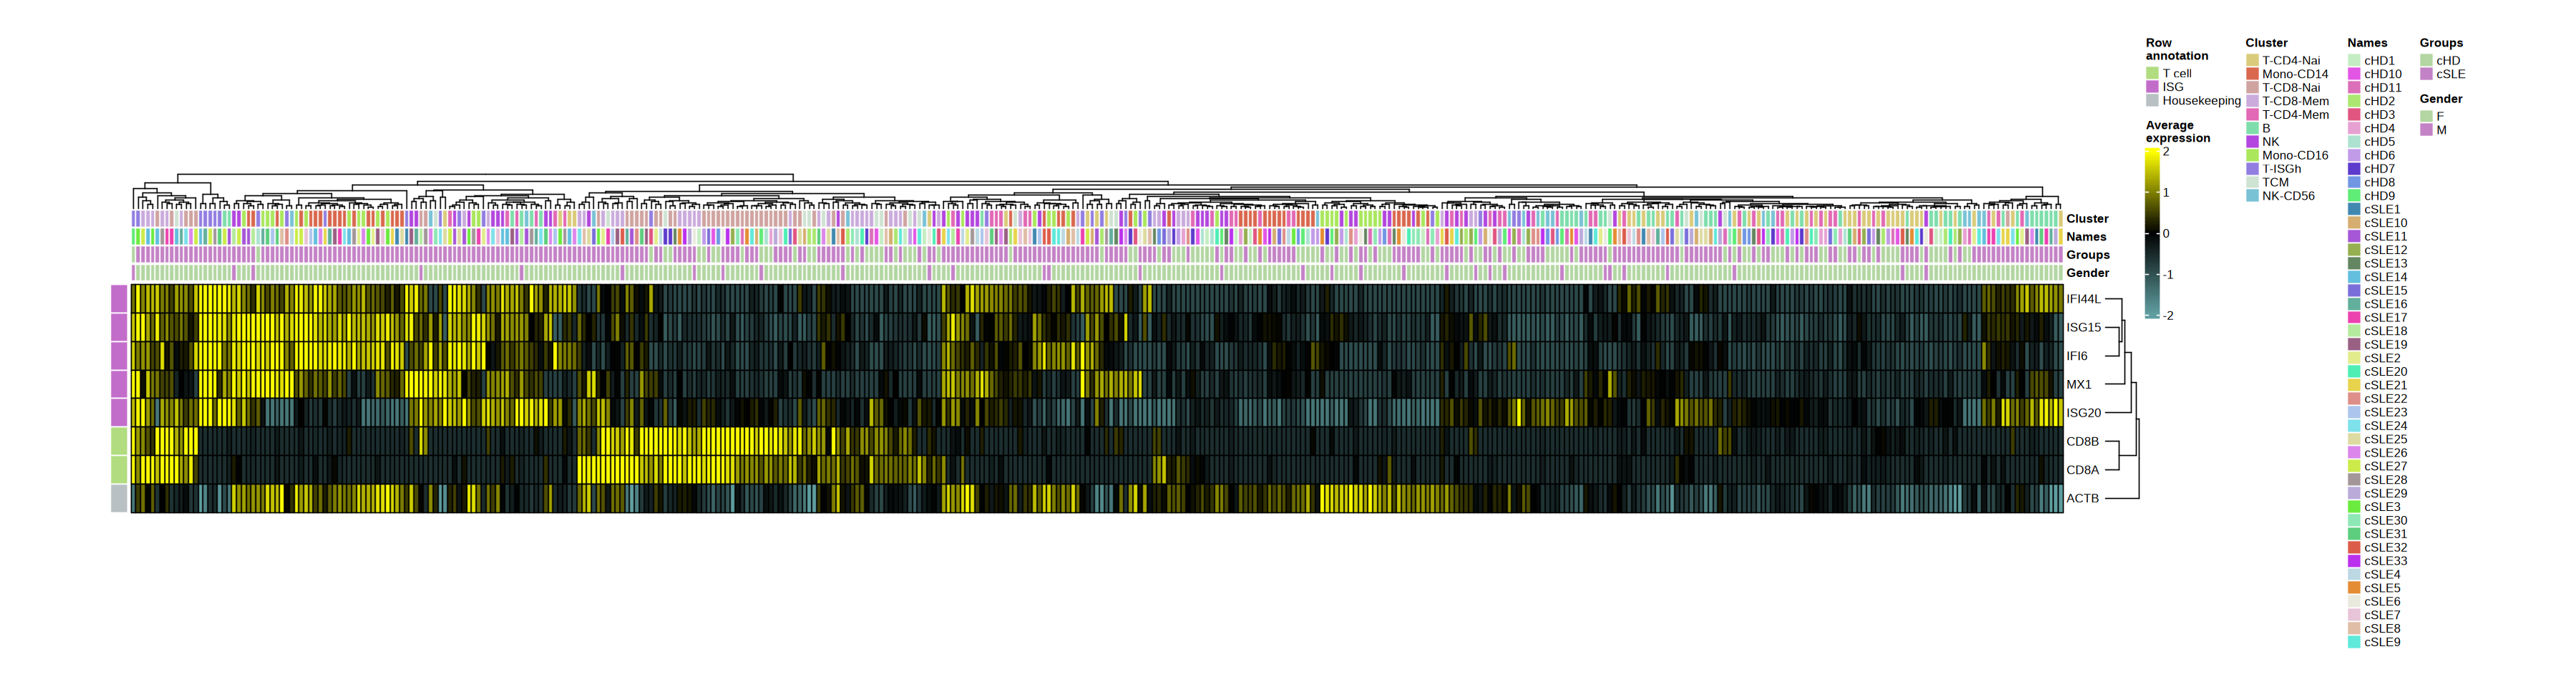

In [26]:
options(repr.plot.width = 30, repr.plot.height = 8)
RunSummarizedHeatmap(object = my.pbmc.pi,
                     ident = "cluster.annotation",
                     features = features,
                     split.by = "Names", ## sample name
                     additional.metadata = c("Groups", "Gender"),
                     heatmap.width = 60,
                     heatmap.height = 10,
                     show.column.names = FALSE)

## 3.4 Expression plot

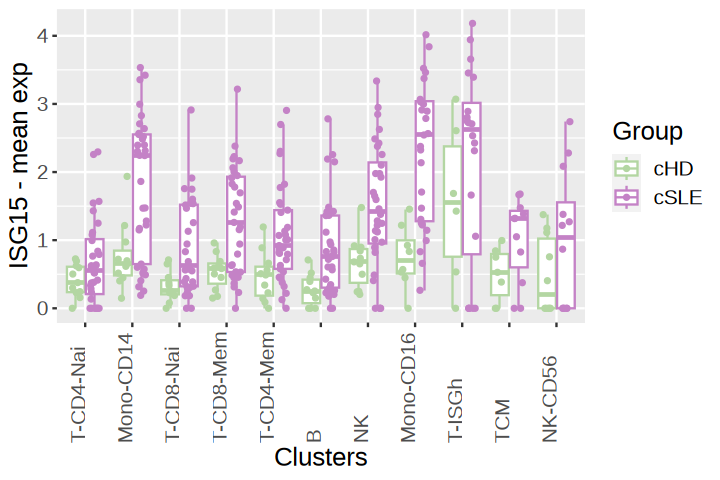

In [27]:
options(repr.plot.width = 6, repr.plot.height = 4)
RunExpressionPlot(object = my.pbmc.pi,
                  feature = "ISG15",
                  ident = "cluster.annotation",
                  group.by = "Names",
                  split.by = "Groups")

# 4 Data export

In [28]:
ExportPiData(object = csle.pbmc.pi,
             field = 'ds',
             key = 'DS|subcluster_idents|edgeR|group=Groups;sample=Names;gp1=cSLE;gp2=cHD;contrast=cSLE-cHD',
             file.prefix = 'pbmc.ds' ## A mandatory argument. User should provide an informative prefix (e.g., "csle.pbmc") for exported data
)